In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

names1880=pd.read_csv("data/babynames/yob1880.txt", 
                     names=['name', 'sex', 'births'])
names1880
names1880.shape
names1880.info()


SyntaxError: invalid syntax (<ipython-input-3-149cd1d489b1>, line 10)

In [4]:
years=range(1880, 2011)
pieces=[]
for year in years:
    path="data/babynames/yob%d.txt" % year
    frame=pd.read_csv(path, names=['name', 'sex', 'births'])
    frame['year']=year
    pieces.append(frame)
names=pd.concat(pieces, ignore_index=True)
names.shape
#len(pieces) #[frame,   ,   , ]

(1690784, 4)

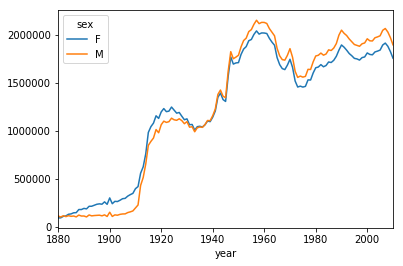

In [7]:
total_births=names.pivot_table('births', index='year', 
                  columns='sex', aggfunc=sum)
total_births.plot()

In [8]:
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
1885,133056,107802
1886,144538,110785
1887,145983,101412
1888,178631,120857


In [9]:
names
#169만의 의미?
#각 년도별/성별 이름에 대한 종류의 합

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [18]:
#names.groupby(['year', 'sex']).births.sum()
def add_prop(group):
    group['prop']=group.births/group.births.sum()
    return group
    #group.info()
    #print(group)
    #retrun group
names=names.groupby(['year', 'sex']).apply(add_prop)
print(names)


              name sex  births  year      prop
0             Mary   F    7065  1880  0.077643
1             Anna   F    2604  1880  0.028618
2             Emma   F    2003  1880  0.022013
3        Elizabeth   F    1939  1880  0.021309
4           Minnie   F    1746  1880  0.019188
5         Margaret   F    1578  1880  0.017342
6              Ida   F    1472  1880  0.016177
7            Alice   F    1414  1880  0.015540
8           Bertha   F    1320  1880  0.014507
9            Sarah   F    1288  1880  0.014155
10           Annie   F    1258  1880  0.013825
11           Clara   F    1226  1880  0.013474
12            Ella   F    1156  1880  0.012704
13        Florence   F    1063  1880  0.011682
14            Cora   F    1045  1880  0.011484
15          Martha   F    1040  1880  0.011429
16           Laura   F    1012  1880  0.011122
17          Nellie   F     995  1880  0.010935
18           Grace   F     982  1880  0.010792
19          Carrie   F     949  1880  0.010429
20           

In [27]:
#연도별, 성별에 따른 빈도수가 가장 높은 이름 1000개 추출
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
    #print(group)

grouped=names.groupby(['year', 'sex'])
top1000=grouped.apply(get_top1000)
top1000.index=np.arange(len(top1000))
top1000.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            261867, 261868, 261869, 261870, 261871, 261872, 261873, 261874,
            261875, 261876],
           dtype='int64', length=261877)

In [33]:
#이름 유행 분석
boys=top1000[top1000.sex=="M"]
girls=top1000[top1000.sex=="F"]

In [36]:
total_births=top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B739E97940>,
      dtype=object)

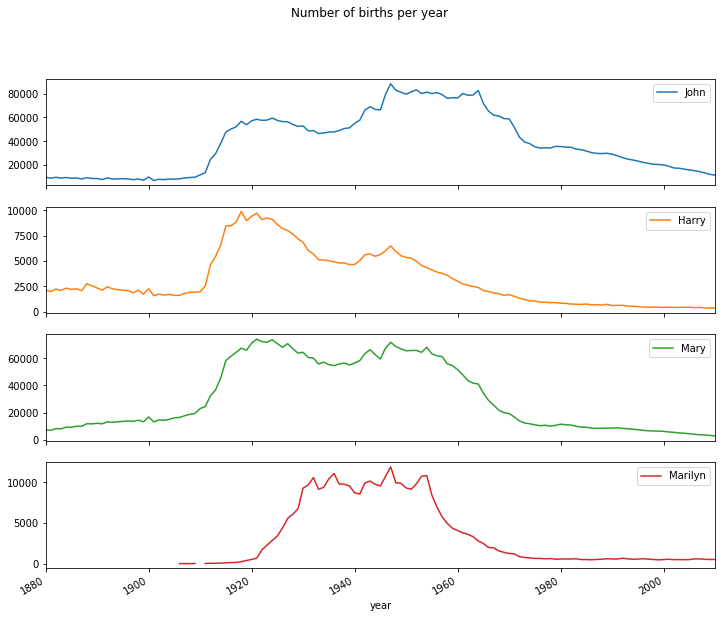

In [45]:
sub_set=total_births[['John','Harry','Mary', 'Marilyn']]
sub_set.plot(subplots=True, figsize=(12,10),title="Number of births per year")

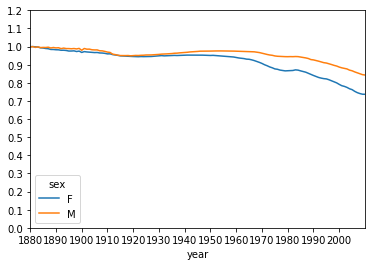

In [55]:
table=top1000.pivot_table('prop', index='year', 
                    columns='sex', aggfunc=sum)
#table.shape
table.plot(xticks=range(1880,2010,10), yticks=np.linspace(0,1.2,13))

In [75]:
df=boys[boys.year==2010]
df
prop_cumsum=df.sort_values(by='prop',ascending=False).prop.cumsum()
prop_cumsum[:10] #0번~999번
prop_cumsum.values.searchsorted(0.5) #116
#정렬된 상탱서 0.5가 되는 위치? 117번째(116+1)
prop_cumsum.values[116]

0.5006516075268308

In [79]:
#names[names.year==2010].shape

(33838, 5)

In [84]:
df=boys[boys.year==1900]
in1900=df.sort_values(by='prop',ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5)+1 #116
#정렬된 상탱서 0.5가 되는 위치? 117번째(116+1)
#prop_cumsum.values[116]

25

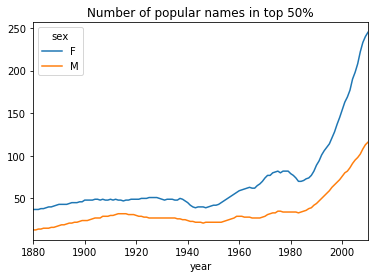

In [101]:
def get_quantile_count(group, q=0.5):
    group=group.sort_values(by='prop', ascending=False)
    #print(group)
    return group.prop.cumsum().values.searchsorted(q)
    
diversity=top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity=diversity.unstack('sex')
diversity.plot(title="Number of popular names in top 50%")    

In [115]:
get_last_letter=lambda x: x[-1]
last_letters=names.name.map(get_last_letter)
last_letters.name='last_letter'
last_letters
table=names.pivot_table('births', index=last_letters, 
                  columns=['sex','year'], aggfunc=sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k               19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l             6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m               90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n             5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o               97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p                NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q                NaN      NaN      NaN  ...     602.0     618.0     585.0   
r              910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s             2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t             3140.0   3816.0   3784.0  ...

In [120]:
subtable=table.reindex(columns=[1910,1960,2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [121]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [125]:
letter_prop=subtable/(subtable.sum())
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

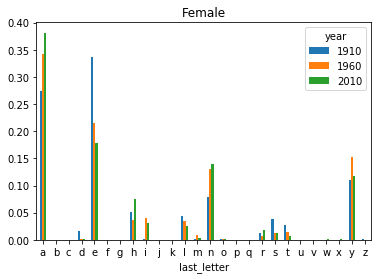

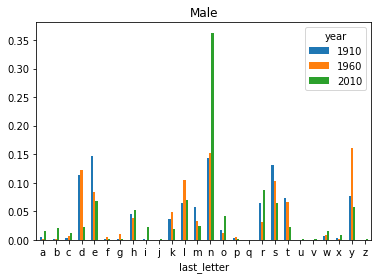

In [133]:
letter_prop['F'].plot(kind='bar',rot=0, title='Female')
letter_prop['M'].plot(kind='bar',rot=0, title='Male')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


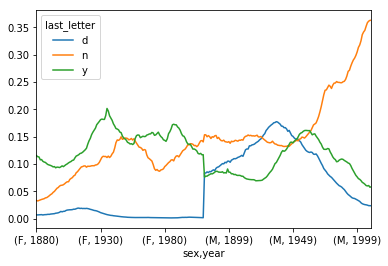

In [144]:
#d/n/y로 끝나는 이름을 가진 남자아이의 출생 비율
#               d           n           y
#     1880
    
#     2010
letter_prop=table/table.sum()
dny_ts=letter_prop.ix[['d','n','y']].T
dny_ts.plot()

In [160]:
unames=['user_id', 'gender', 'age', 'occupation','zip']
rnames=['user_id', 'movie_id', 'rating', 'timestamp']
mnames=['movie_id', 'title', 'genres']
users=pd.read_csv("data/movielens/users.dat",
                  names=unames,header=None,sep="::")
ratings=pd.read_csv("data/movielens/ratings.dat",
                    names=rnames,header=None,sep="::")
movies=pd.read_csv("data/movielens/movies.dat",
                   names=mnames,header=None,sep="::")

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [163]:
users.shape#(6040, 5)
ratings.shape#(100만, 4)
#ratings
#movies
#연도,제목를 추출하는 정규표현식 작성 -> year,title컬럼 생성
#장르 -> 원핫인코딩


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [172]:
#ratings
#users
data=pd.merge(pd.merge(ratings, users), movies)
#data.info()
data.ix[0]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [193]:
#성별에 따른 각 영화의 평균 평점을 출력
mean_ratings=data.pivot_table('rating',index='title',
                              columns='gender',aggfunc='mean')
mean_ratings
#         F     M
# Drama  3.5   4.0
#mean_ratings.shape #(3706, 2)
ratings_by_title=data.groupby('title').size()
#ratings_by_title['X-Men (2000)']
#ratings_by_title[ratings_by_title>=250]
active_titles=ratings_by_title.index[ratings_by_title>=250]
#ratings_by_title.values[ratings_by_title>=250]

In [195]:
len(active_titles)

1216

In [199]:
mean_ratings=mean_ratings.loc[active_titles]
#mean_ratings.ix[active_titles]

In [202]:
top_female_ratings=mean_ratings.sort_index(by='F', ascending=False)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [214]:
mean_ratings['diff']=np.abs(mean_ratings['M']-mean_ratings['F'])
mean_ratings
#mean_ratings.sort_index(by='diff')
sorted_by_diff=mean_ratings.sort_values(by='diff')


(1216, 3)

In [222]:
sorted_by_diff[::-1][0:5]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608


In [226]:
data.groupby('title')['rating'].std()

title
$1,000,000 Duck (1971)                            1.092563
'Night Mother (1986)                              1.118636
'Til There Was You (1997)                         1.020159
'burbs, The (1989)                                1.107760
...And Justice for All (1979)                     0.878110
1-900 (1994)                                      0.707107
10 Things I Hate About You (1999)                 0.989815
101 Dalmatians (1961)                             0.982103
101 Dalmatians (1996)                             1.098717
12 Angry Men (1957)                               0.812731
13th Warrior, The (1999)                          1.140421
187 (1997)                                        1.057919
2 Days in the Valley (1996)                       0.921592
20 Dates (1998)                                   1.151943
20,000 Leagues Under the Sea (1954)               0.869685
200 Cigarettes (1999)                             1.111964
2001: A Space Odyssey (1968)                      

In [228]:
import json
fr=open("data/bitly_usagov/example.txt")
fr.readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [236]:
records=[json.loads(line) for line in open("data/bitly_usagov/example.txt", encoding='utf8')]
records[0]['tz']

'America/New_York'

In [238]:
#[rec['tz'] for rec in records]
[rec['tz'] for rec in records if 'tz' in rec]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'America/New_York',
 'America/Denver',
 'Europe/Rome',
 'Africa/Ceuta',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Europe/Madrid',
 'Asia/Kuala_Lumpur',
 'Asia/Nicosia',
 'America/Sao_Paulo',
 '',
 '',
 'Europe/London',
 'America/New_York',
 'Pacific/Honolulu',
 'America/Chicago',
 '',
 '',
 'Pacific/Honolulu',
 '',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/Chicago',
 'Europe/Rome',
 'America/New_York',
 'America/New_York',
 'America/Los_Angeles',
 '',
 '',
 'America/New_York',
 'America/New_York',
 'Europe/Malta',
 'America/New_York',
 'America/New_York',
 '',
 'America/Los_Angeles',
 'America/Sao_Paulo',
 '',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'Paci